# Homework 5


## 1. Clustering, 45 points


1. Load the usual Iris data restricted to the first two features, and ignore the class / target variable. Plot the data and see for yourself how “clustered” you think it looks. Include the plot, and mention how many clusters you think exist (no wrong answer here). (5 points)


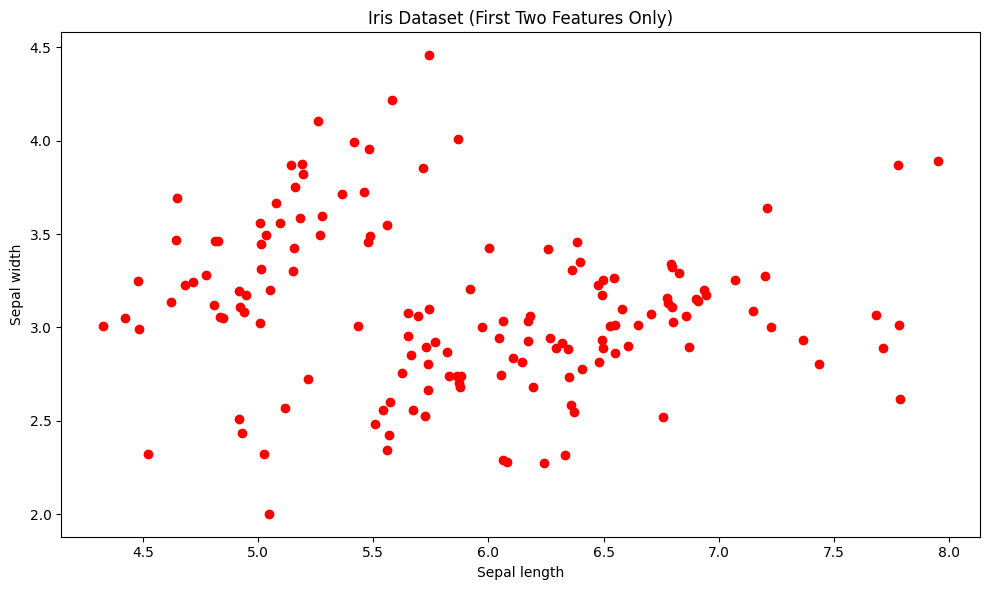

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import mltools.cluster as cluster

iris = np.genfromtxt("data/iris.txt", delimiter=None)  # load the text file
Y = iris[:, -1]
X = iris[:, 0:2]

plt.figure(figsize=(10, 6))
colors = ["red"]

plt.scatter(X[:, 0], X[:, 1], c=colors)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Iris Dataset (First Two Features Only)")

plt.tight_layout()
plt.show()

2. Run k-means on the data, for k = 2, k = 5, and k = 20. Try a few (at least 5 each) different initializations and check to see whether they find the same solution; if not, pick the one with the best score. For the chosen assignment for each k, include a plot with the data, colored by assignment, and the cluster centers. You can plot the points colored by assignments using ml.plotClassify2D(None,X,z) , where z are the resulting cluster assignments of the data. You will have to additionally plot the centers yourself. (15 points)


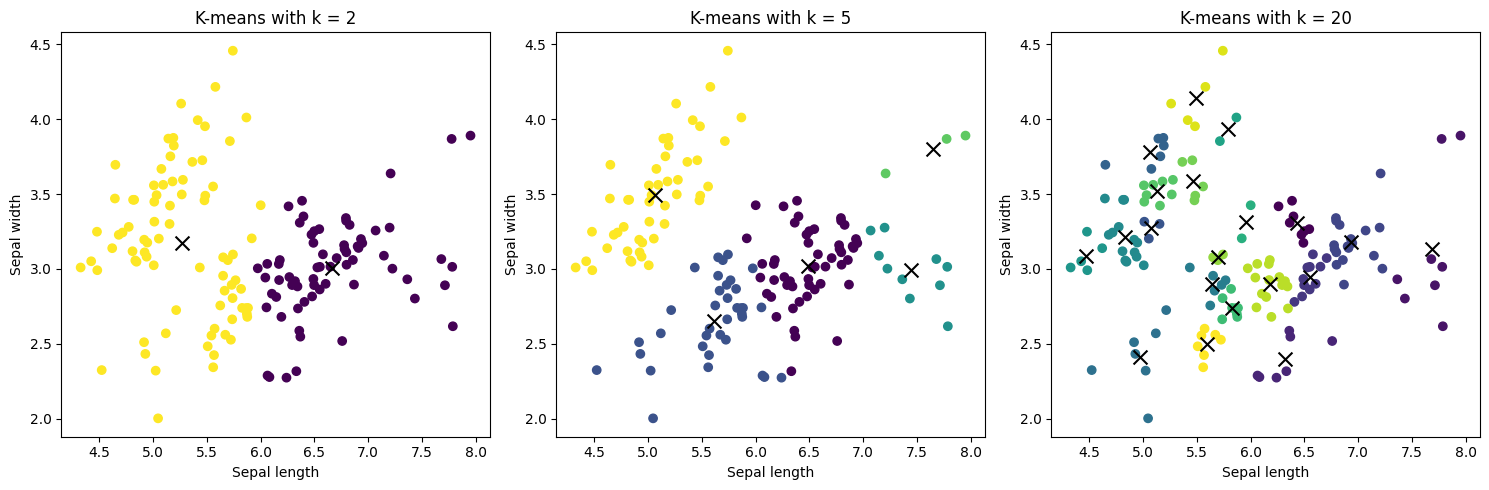

In [46]:
k = [2, 5, 20]

plt.figure(figsize=(15, 5))
colors = np.random.rand(20, 3)

for i in k:
    z, c, sumd = cluster.kmeans(X, i)

    plt.subplot(1, len(k), k.index(i) + 1)
    plt.scatter(X[:, 0], X[:, 1], c=z)
    plt.scatter(c[:, 0], c[:, 1], s=100, marker="x", c="black")

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title("K-means with k = " + str(i))

plt.tight_layout()
plt.show()

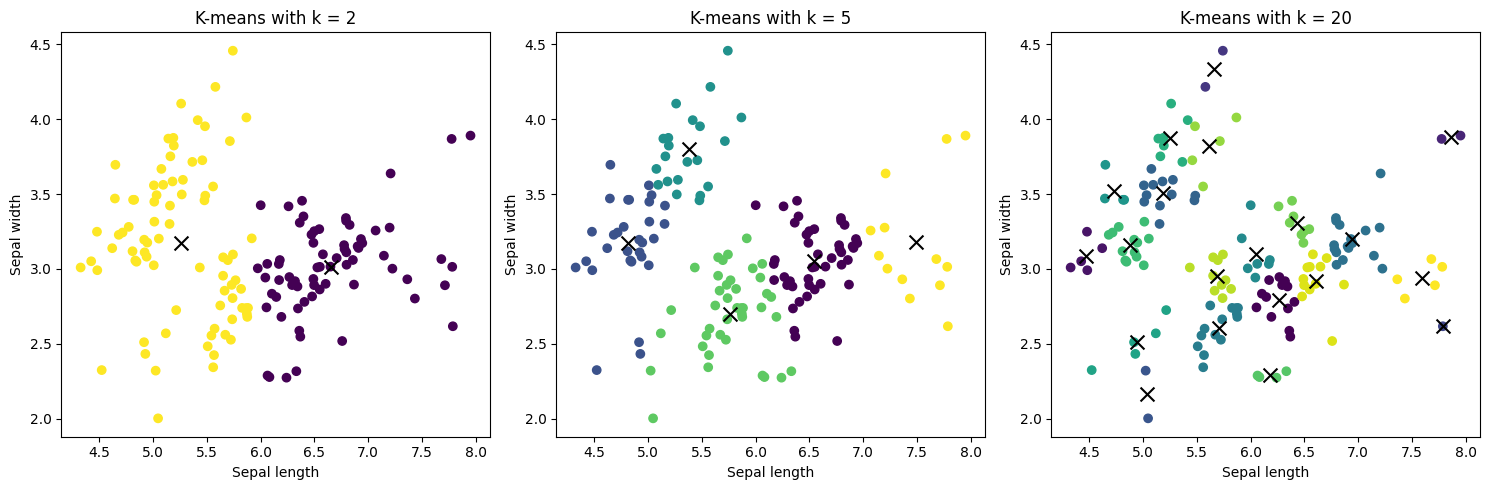

In [47]:
k = [2, 5, 20]

plt.figure(figsize=(15, 5))

for i in k:
    z, c, sumd = cluster.kmeans(X, i, init="farthest")

    plt.subplot(1, len(k), k.index(i) + 1)
    plt.scatter(X[:, 0], X[:, 1], c=z)
    plt.scatter(c[:, 0], c[:, 1], s=100, marker="x", c="black")

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title("K-means with k = " + str(i))

plt.tight_layout()
plt.show()

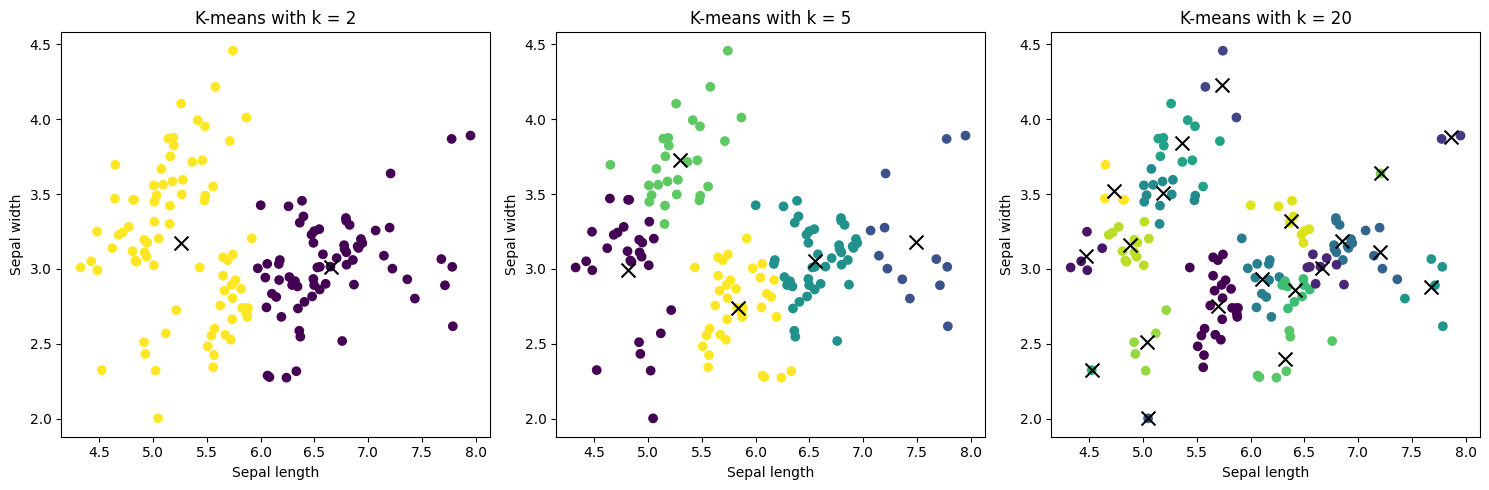

In [48]:
k = [2, 5, 20]

plt.figure(figsize=(15, 5))

for i in k:
    z, c, sumd = cluster.kmeans(X, i, init="k++")

    plt.subplot(1, len(k), k.index(i) + 1)
    plt.scatter(X[:, 0], X[:, 1], c=z)
    plt.scatter(c[:, 0], c[:, 1], s=100, marker="x", c="black")

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title("K-means with k = " + str(i))

plt.tight_layout()
plt.show()

3. Run agglomerative clustering on the data, using single linkage and then again using complete linkage ,
   each with 2, 5, and then 20 clusters (using ml.cluster.agglomerative from cluster.py ). Again, plot
   with color the final assignment of the clusters. (This algorithm has no initialization issues; so you do not have to try multiple initializations.)


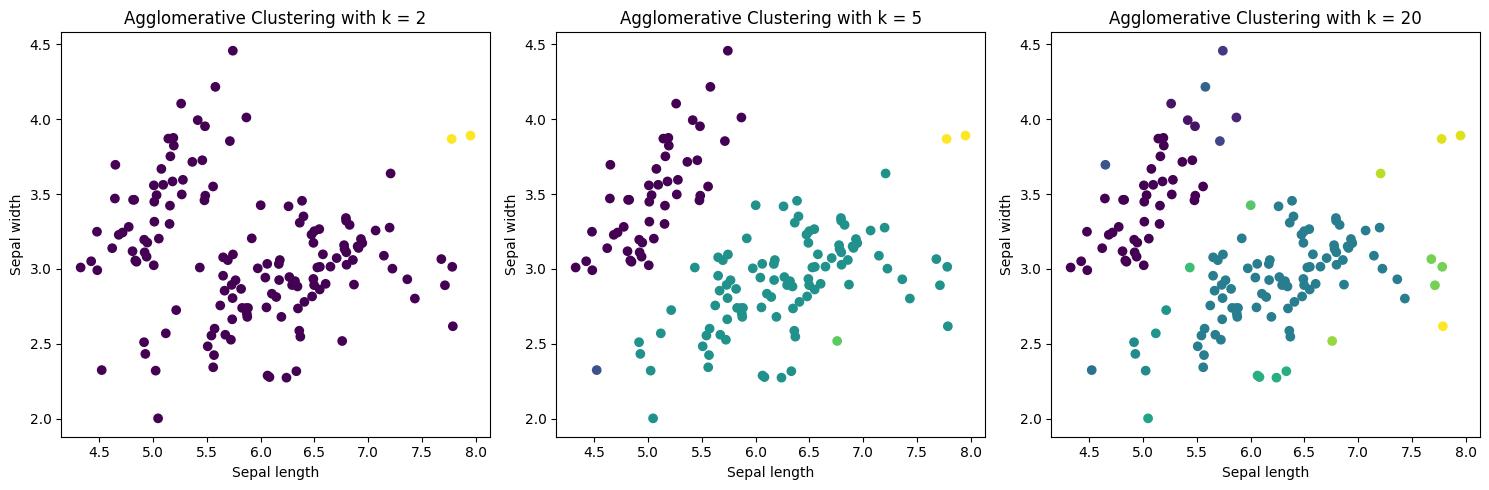

In [49]:
k = [2, 5, 20]

plt.figure(figsize=(15, 5))

for i in k:
    z, join = cluster.agglomerative(X, i, "min")

    plt.subplot(1, len(k), k.index(i) + 1)
    plt.scatter(X[:, 0], X[:, 1], c=z)

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title("Agglomerative Clustering with k = " + str(i))

plt.tight_layout()
plt.show()

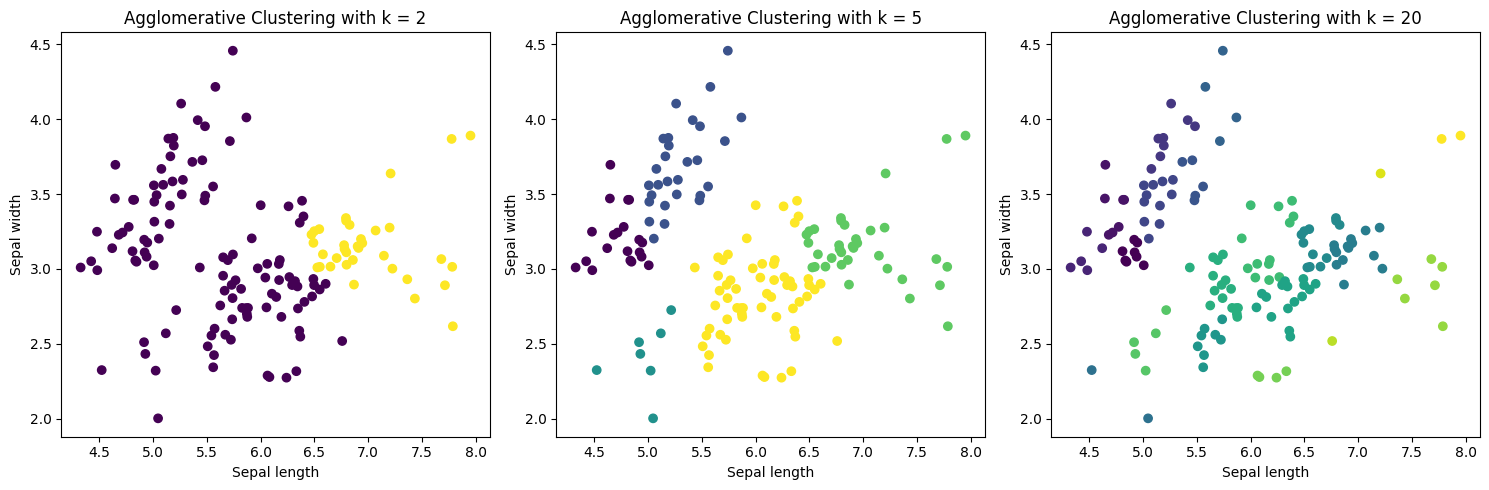

In [50]:
k = [2, 5, 20]

plt.figure(figsize=(15, 5))

for i in k:
    z, join = cluster.agglomerative(X, i, "max")

    plt.subplot(1, len(k), k.index(i) + 1)
    plt.scatter(X[:, 0], X[:, 1], c=z)

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title("Agglomerative Clustering with k = " + str(i))

plt.tight_layout()
plt.show()

4. Describe similarities and differences in the results from the agglomerative clustering and k-means. (5 points)


Similarities:

1. Both algorithms are unsupervised learning algorithms.
2. Both algorithms are sensitive to the initial conditions.
3. Both algorithms will produce the same output every time they are run.

Differences:

1. K-means tends to produce more spherical clusters due to its reliance on Euclidean distance, making it less effective for complex cluster shapes.
2. Agglomerative Clustering, especially with different linkage criteria, can adapt to various shapes and sizes of clusters. For example, complete linkage tends to create more compact clusters, while single linkage might result in a chain-like structure.
